# ML Week 3 - K-Means Clustering
##### Today we will build our very first Machine Learning algorithm from scratch!
##### We will be building an unsupervised algorithm called "K-means". It is useful for identifying patterns in messy tabular data by "clustering" rows that seem to have similar properties. As it is unsupervised, we don't have to worry about labelling data beforehand.

### Datset
Today we will build a very "toy" version of K-means, and therefore use a super simplistic dataset. This is a made-up dataset of stone tool measurements (the values are from the super famous "Iris" Dataset - a dataset of different types of Iris flowers containing measurements of the pedals).

Next week we will apply K-means to a real architecture dataset

### How it works:

<div>
<img src="Kmeans.png" width="1500"/>
</div>

## Importing Common Packages
##### Always a good place to start

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in our dataset

In [4]:
# download tool data and read it into a dataframe
df = pd.read_csv("./tools.csv")

In [5]:
df

,Length,Width,Thickness,SharpEdgeWidth,Culture
0,5.1,3.5,1.4,0.2,Bear Culture
1,4.9,3.0,1.4,0.2,Bear Culture
2,4.7,3.2,1.3,0.2,Bear Culture
3,4.6,3.1,1.5,0.2,Bear Culture
4,5.0,3.6,1.4,0.2,Bear Culture
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Beaver Culture
146,6.3,2.5,5.0,1.9,Beaver Culture
147,6.5,3.0,5.2,2.0,Beaver Culture
148,6.2,3.4,5.4,2.3,Beaver Culture


In [6]:
# The last column ("Culture") contains the name of the culture for each row. This is kinda the answer.
# Let's remove it for now and see if we can identify the different cultures ourselves. Using it would kinda be cheating

X = df[["Length", "Width", "Thickness", "SharpEdgeWidth"]]
y = df['Culture']

# Cleaner way:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [7]:
X.head()

,Length,Width,Thickness,SharpEdgeWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='Length', ylabel='Width'>

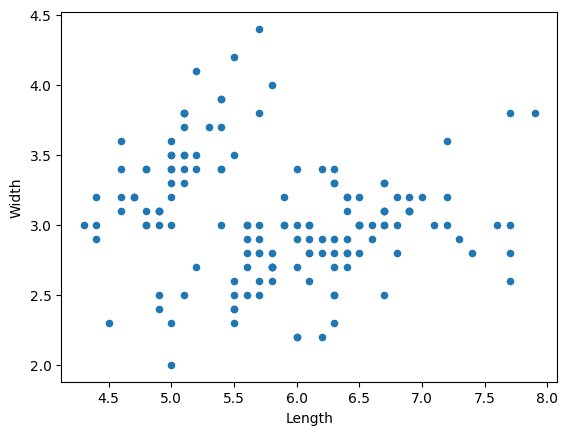

In [8]:
X.plot.scatter(x = 'Length', y='Width')

In [9]:
# Depending on ML application it is sometimes better to use a numpy array vs a DataFrame.
# Here we now only have numeric data, and we don't really care about the meanings of the columns beyond this point
# So this is a good time to use a numpy array - it's cleaner and we can manipulate it more easily.
X = X.to_numpy()

In [14]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## A quick intro to NumPy Arrays

In [15]:
# For a 2D numpy array you can get a specific item like this:
# 12th row, 2nd column:
X[11,1] # (Remember the indices start from 0)

# we can get rows or columns like this:
# First row:
X[0,:]
# Last row:
X[-1,:]
# First column:
X[:,1]
# Last column:
X[:,-1]

# You can also choose only specific rows, similar to with dataframes
X[X[:,1] < 1]

# Or return all values that satisfy the condition
X[X < 1]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2])

In [16]:
# Let's chceck the shape of our data.
# We see we have 150 points, each with 4 "features". These are like points in some big "4D" space
X.shape

(150, 4)

## Randomly select K points
##### Here we will set K=3. Later we will study how to choose the best K value

In [17]:
# We need to randomly select 3 points to set as cluster centres
# This command randomly shuffles the numbers 0 to 149
randomized_X = np.random.permutation(X.shape[0])

In [18]:
randomized_X

array([ 49,  45, 138,  50, 102,  57,  61,  58, 116,  76,  69,  27,  65,
       112,  98,  62, 121,  39,  18,  15,  60,  31,  87, 142, 115,  70,
        78,  48,  68,   4, 125,   5, 146, 136, 113,  71, 103,  13,   3,
       137,  34,   6,  89,  52, 144, 109,  22, 139,  46, 100,  90,  81,
       117, 126,  91,  96,  97,  19, 105,  41,  43,  32,  74,  25, 122,
        80, 101,   0, 129, 110, 135, 120,  14,  63,  94,  44, 131,  55,
        37,  36,  59, 132,  99,  16, 118,   8,  26, 106,   9, 133,  83,
        10,  12,  85,  67,  72,   1, 124, 141,  88, 108, 119,  11,  64,
       140, 149,  17, 134, 111,  21,  95,  30,  86,  53,  23,  92,  40,
        82, 107, 123, 145,  35,  66, 143,  33, 147,  24,  20, 114, 127,
         2, 130,  28,  77, 148,  51,  84,  56,  75,  79,  29,  42, 128,
       104,   7,  47,  93,  54,  73,  38], dtype=int32)

In [19]:
# We can now pick 3 of these numbers (the first 3 - it doesn't matter where we pick them from as they have been shuffled)
centroid_idx = randomized_X[:3]
# Then, from the X array, we take the 3 points that correspond to the 3 random numbers we picked
centroids = X[centroid_idx]
# What we have now done is randomly chosen 3 points from X (ie. 3 flowers)

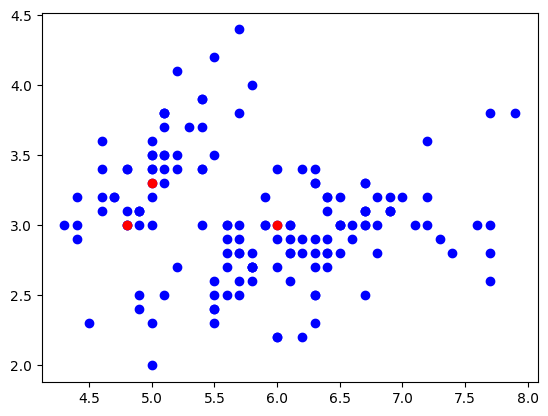

In [20]:
# We can see the 3 random points we have selected
plt.scatter(x = X[:,0], y = X[:,1], c='blue')
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## For each point, we now check which centroid it's closest to
##### We can do this using the numpy linalg.norm function

In [30]:

points = np.array((), dtype=np.int8)
for i in range(len(X)):
    distance_1 = np.linalg.norm((X[i] - centroids[0]))
    distance_2 = np.linalg.norm((X[i] - centroids[1]))
    distance_3 = np.linalg.norm((X[i] - centroids[2]))
    cluster = np.argmin([distance_1, distance_2, distance_3])
    points = np.append(points, cluster)

# A more efficient way of doing this:
#for i in range(len(X)):
#    cluster = np.argmin(np.linalg.norm((X[i] - centroids), axis=-1))
#    points = np.append(points, cluster)

In [31]:
points

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

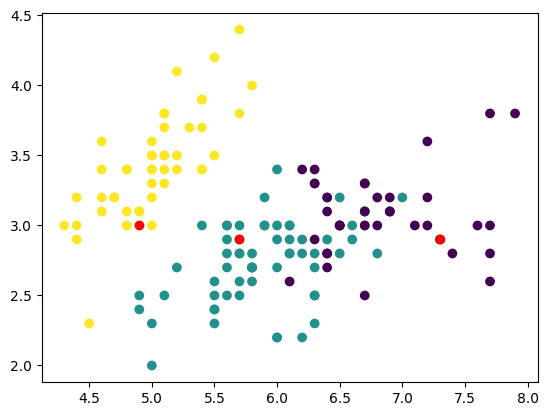

In [45]:
plt.scatter(x = X[:,0], y = X[:,1], c=points)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## Define new centroids as the centres (means) of each cluster
##### That's why it's called k-means! O_O

In [46]:
# This is actually quite easy to do
# X[points==i] takes only the rows of X which are attributed to cluster "i". Then we just average these with ".mean"
for i in range(3):
    centroids[i] = X[points==i].mean(axis=0)

In [47]:
# And now we have new centroids!
centroids

array([[6.86285714, 3.07142857, 5.80571429, 2.1       ],
       [5.93846154, 2.76461538, 4.42153846, 1.44769231],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

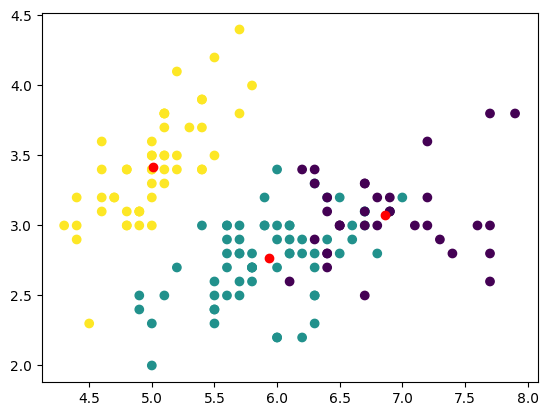

In [ ]:
# We can see the centroids moving to the centre of the clusters:

plt.scatter(x = X[:,0], y = X[:,1], c=points)
plt.scatter(x = centroids[:,0], y = centroids[:,1], c='red')

## Taking all of this and putting it into a K-means function

In [53]:
def kmeans(X:np.array, K:int=3, iterations:int=100) -> np.array:
    for _ in range(iterations):
        randomized_X = np.random.permutation(X.shape[0])
        centroid_idx = randomized_X[:K]
        centroids = X[centroid_idx]
        points = np.array((), dtype=np.int8)
        for i in range(len(X)):
            cluster = np.argmin(np.linalg.norm((X[i] - centroids), axis=-1))
            points = np.append(points, cluster)
        for i in range(K):
            centroids[i] = X[points==i].mean(axis=0)
    return np.column_stack((X,points))

In [55]:
pred = kmeans(X,3,100)

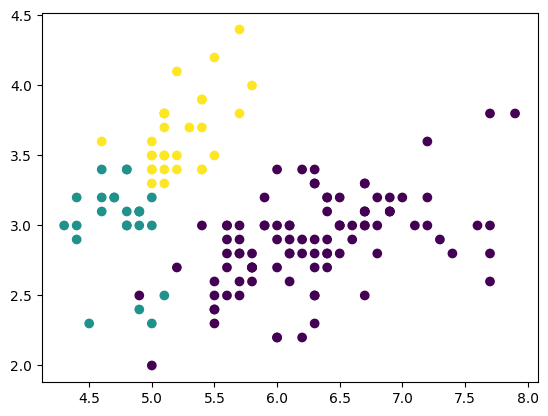

In [76]:
plt.scatter(x = X[:,0], y = X[:,1], c=pred[:,-1])

In [56]:
for i in range(len(y)):
    print(y[i], ", ", int(pred[:,-1][i]))

Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  1
Bear Culture ,  2
Bear Culture ,  2
Owl Culture ,  0
Owl Culture ,  0
Owl Culture ,  0
Owl Culture ,  0
Owl Culture ,  0
Owl Culture ,  

## Let's see how this could have been done with sklearn pre-packaged k-means

In [ ]:
# Import the package
from sklearn.cluster import KMeans

In [ ]:
# Initialize Kmeans and fit it to our data
kmeans2 = KMeans(n_clusters=3, max_iter=100).fit(X)


In [ ]:
# Let's save the labels as a new list of predictions
pred2 = kmeans2.labels_

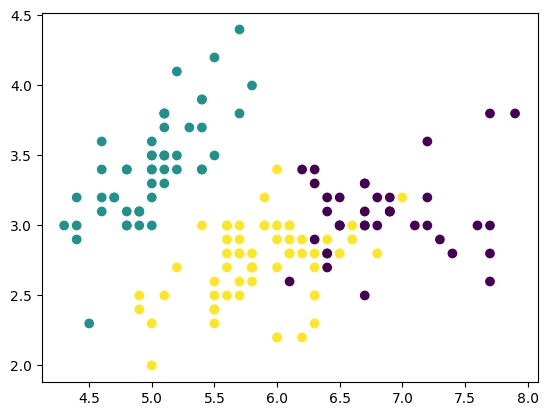

In [ ]:
# We can see we arrive at something quite similar to what we coded ourselves.
plt.scatter(x = X[:,0], y = X[:,1], c=pred2[:])

In [ ]:
# Now if we have the measurements of a new tool, we can predict which culture it is likely from using the predict method
new_tool = np.array([[1, 1, 5, 1]]) # Note the double sqare brackets. This is because we can esimte
kmeans2.predict(new_tool)

array([2], dtype=int32)

# Exercises

### Exercise 1
K-means is an unsupervised algorithm, which means we generally don't have a way to "test" its performance. However, in our case we do have labels, so we may be curious to see how it has performed.
Look at the "y" array - this contains the names of the cultures producing these tools. But the "pred" (predictions) array only has integer values (0,1,2). So first we need to check which integer corresponds to each culture.
You can do this by looping across the entries of your numpy array, or by switching it to a dataframe (pd.DataFrame(data=pred)) and then using groupby.

Now you can compute the accuracy of our clustering. See for how many rows of the pred array the predicted labels (0,1,2) match the actual ones (in y). How did we do?

### Exercise 2
KMeans has lots of arguments. Explore some of them:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

init and n_init, for example. Also set verbose to True so you can see what happens as the algorithm is fit to the data